In [1]:
import pandas
import numpy
import os


#package data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#load data
path = os.getcwd()
path_data = path+'\data'
name_file = '\data_salary.csv'

df = pandas.read_csv(path_data+name_file)
df.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [3]:
df['Salary'] = df['Salary'].astype(int)
df.head(5)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
# summary statistic data
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


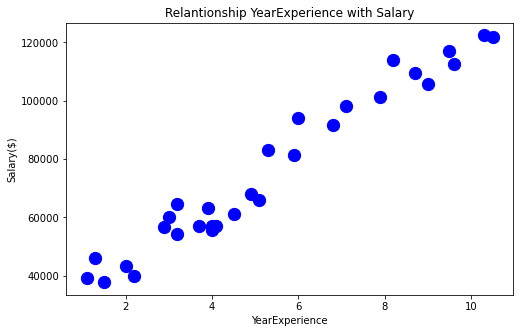

In [5]:
#data visualization with scatter plot
fig=plt.figure(figsize=(8,5))
plt.scatter(df['YearsExperience'],df['Salary'],color='blue',s=150)
plt.title('Relantionship YearExperience with Salary')
plt.xlabel('YearExperience')
plt.ylabel('Salary($)')
plt.show()

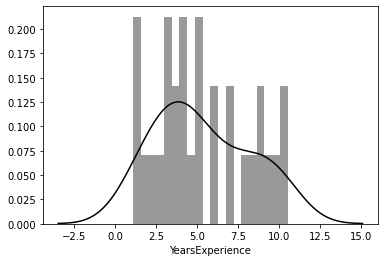

In [6]:
sns.distplot(df['YearsExperience'], bins=20, color='black')

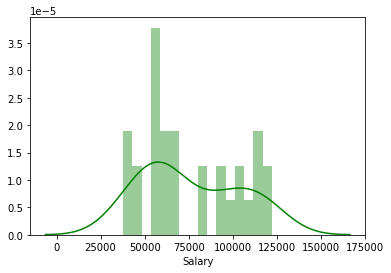

In [7]:
sns.distplot(df['Salary'], bins=16, color='green')

In [8]:
#data clustering
""" 
    junior =< 3 year experience
    middle =< 5 year experience
    senior > 5 year experience 
"""

def cluter_experience(x):
    if x <= 3:
        result = 'Junior Experience'
    elif x <= 5:
        result = 'Middle Experience'
    else:
        result = 'Senior Experience'
    return result

In [9]:
df['StatusExperience'] = df['YearsExperience'].apply(cluter_experience)
df.head(5)

,YearsExperience,Salary,StatusExperience
0,1.1,39343,Junior Experience
1,1.3,46205,Junior Experience
2,1.5,37731,Junior Experience
3,2.0,43525,Junior Experience
4,2.2,39891,Junior Experience


In [10]:
db = df.groupby(['StatusExperience'],as_index=False).agg({'Salary':['count','mean','min','max']})

In [11]:
db

StatusExperience Salary                              
                      count           mean    min     max
0  Junior Experience      7   46212.428571  37731   60150
1  Middle Experience      9   59797.555556  54445   67938
2  Senior Experience     14  101316.071429  66029  122391

In [12]:
db.columns.droplevel(level=1)

Index(['StatusExperience', 'Salary', 'Salary', 'Salary', 'Salary'], dtype='object')

In [13]:
db.columns.droplevel(level=0)

Index(['', 'count', 'mean', 'min', 'max'], dtype='object')

In [14]:
db.columns = db.columns.droplevel(level=0)

In [15]:
db.columns

Index(['', 'count', 'mean', 'min', 'max'], dtype='object')

In [16]:
db = db.rename(columns={"":"Status Experience",
                        "count":"Count Number",
                        "mean":"Average Salary",
                        "min":"Minimal Salary",
                        "max":"Maximal Salary",})

In [17]:
db['Average Salary'] = db['Average Salary'].astype(int)

In [18]:
db.head()

,Status Experience,Count Number,Average Salary,Minimal Salary,Maximal Salary
0,Junior Experience,7,46212,37731,60150
1,Middle Experience,9,59797,54445,67938
2,Senior Experience,14,101316,66029,122391


In [53]:
db.columns

Index(['Status Experience', 'Count Number', 'Average Salary', 'Minimal Salary',
       'Maximal Salary'],
      dtype='object')

In [137]:
dp = db[['Status Experience', 'Average Salary', 'Minimal Salary','Maximal Salary']]
dp

,Status Experience,Average Salary,Minimal Salary,Maximal Salary
0,Junior Experience,46212,37731,60150
1,Middle Experience,59797,54445,67938
2,Senior Experience,101316,66029,122391


In [138]:
# .style.hide_index()
num_format = lambda x: '$ {:,}'.format(x)
for i in dp.columns:
    if i != 'Status Experience':
        dp[i] = dp[i].apply(num_format)

<ipython-input-138-a35f7986debe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp[i] = dp[i].apply(num_format)


In [141]:
dp.style.set_properties(**{'text-align':'left'})

,Status Experience,Average Salary,Minimal Salary,Maximal Salary
0,Junior Experience,"$ 46,212","$ 37,731","$ 60,150"
1,Middle Experience,"$ 59,797","$ 54,445","$ 67,938"
2,Senior Experience,"$ 101,316","$ 66,029","$ 122,391"


In [19]:
#correlaction all value
numpy.corrcoef(df['YearsExperience'],df['Salary'])

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

In [20]:
df.head()

,YearsExperience,Salary,StatusExperience
0,1.1,39343,Junior Experience
1,1.3,46205,Junior Experience
2,1.5,37731,Junior Experience
3,2.0,43525,Junior Experience
4,2.2,39891,Junior Experience


In [21]:
df[df['StatusExperience']=='Junior Experience']

,YearsExperience,Salary,StatusExperience
0,1.1,39343,Junior Experience
1,1.3,46205,Junior Experience
2,1.5,37731,Junior Experience
3,2.0,43525,Junior Experience
4,2.2,39891,Junior Experience
5,2.9,56642,Junior Experience
6,3.0,60150,Junior Experience


In [22]:
df[df['StatusExperience']=='Junior Experience']['Salary']

0    39343
1    46205
2    37731
3    43525
4    39891
5    56642
6    60150
Name: Salary, dtype: int32

In [23]:
numpy.corrcoef(df[df['StatusExperience']=='Junior Experience']['YearsExperience'],
               df[df['StatusExperience']=='Junior Experience']['Salary'])

array([[1.        , 0.81328829],
       [0.81328829, 1.        ]])

In [24]:
numpy.corrcoef(df[df['StatusExperience']=='Middle Experience']['YearsExperience'],
               df[df['StatusExperience']=='Middle Experience']['Salary'])

array([[1.        , 0.43179083],
       [0.43179083, 1.        ]])

In [25]:
numpy.corrcoef(df[df['StatusExperience']=='Senior Experience']['YearsExperience'],
               df[df['StatusExperience']=='Senior Experience']['Salary'])

array([[1.        , 0.94482931],
       [0.94482931, 1.        ]])

In [32]:
df['StatusExperience'].unique()

array(['Junior Experience', 'Middle Experience', 'Senior Experience'],
      dtype=object)

Text(0, 0.5, 'Salary($)')

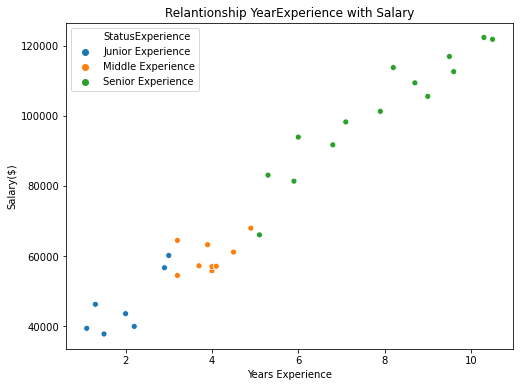

In [147]:
plt.figure(figsize=(8,6))
plt.title("Relantionship Status Experience")
sns.scatterplot(x=df['YearsExperience'], 
                y=df['Salary'],
                hue=df['StatusExperience'])
plt.title('Relantionship YearExperience with Salary')
plt.xlabel('Years Experience')
plt.ylabel('Salary($)')